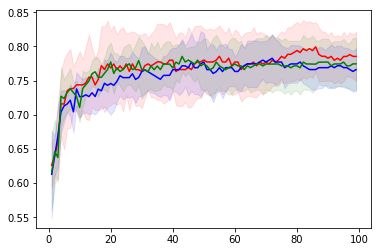

In [30]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

n_estimators_max = 100

#impute missing data with -1
x_train_1 = np.array(pd.DataFrame(x_train).fillna(-1))

mean_1 = np.array([])
std_1 = np.array([])

for i in range(1, n_estimators_max):
    rf = RandomForestClassifier(n_estimators=i, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)
    scores = cross_val_score(rf, x_train_1, y_train, cv=5)
    mean_1 = np.append(mean_1, scores.mean())
    std_1 = np.append(std_1, scores.std())

plt.plot(range(1, n_estimators_max), mean_1, 'r')
plt.fill_between(range(1, n_estimators_max), mean_1-std_1, mean_1+std_1, color='r', alpha=.1)

from sklearn.preprocessing import Imputer

#impute missing data with median

imputer_median = Imputer(strategy='median')
x_train_2 = imputer_median.fit_transform(x_train)

mean_2 = np.array([])
std_2 = np.array([])

for i in range(1, n_estimators_max):
    rf = RandomForestClassifier(n_estimators=i, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)
    scores = cross_val_score(rf, x_train_2, y_train, cv=5)
    mean_2 = np.append(mean_2, scores.mean())
    std_2 = np.append(std_2, scores.std())

plt.plot(range(1, n_estimators_max), mean_2, 'b')
plt.fill_between(range(1, n_estimators_max), mean_2-std_2, mean_2+std_2, color='b', alpha=.1)

#impute missing data with mean

imputer_mean = Imputer(strategy='mean')
x_train_3 = imputer_mean.fit_transform(x_train)

mean_3 = np.array([])
std_3 = np.array([])

for i in range(1, n_estimators_max):
    rf = RandomForestClassifier(n_estimators=i, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)
    scores = cross_val_score(rf, x_train_3, y_train, cv=5)
    mean_3 = np.append(mean_3, scores.mean())
    std_3 = np.append(std_3, scores.std())

plt.plot(range(1, n_estimators_max), mean_3, 'g')
plt.fill_between(range(1, n_estimators_max), mean_3-std_3, mean_3+std_3, color='g', alpha=.1)


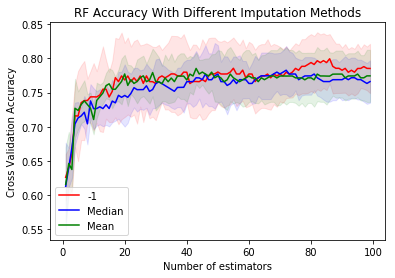

In [33]:
plt.plot(range(1, n_estimators_max), mean_1, 'r', label='-1')
plt.fill_between(range(1, n_estimators_max), mean_1-std_1, mean_1+std_1, color='r', alpha=.1)

plt.plot(range(1, n_estimators_max), mean_2, 'b',  label='Median')
plt.fill_between(range(1, n_estimators_max), mean_2-std_2, mean_2+std_2, color='b', alpha=.1)

plt.plot(range(1, n_estimators_max), mean_3, 'g', label='Mean')
plt.fill_between(range(1, n_estimators_max), mean_3-std_3, mean_3+std_3, color='g', alpha=.1)

plt.legend()
plt.ylabel('Cross Validation Accuracy')
plt.xlabel('Number of estimators')
plt.title('RF Accuracy With Different Imputation Methods')
plt.savefig('rf_different_imputation.png', dpi=300)

In [36]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)
scores_1 = cross_val_score(rf, x_train_1, y_train, cv=5)
scores_2 = cross_val_score(rf, x_train_2, y_train, cv=5)
scores_3 = cross_val_score(rf, x_train_3, y_train, cv=5)
print scores_1, scores_2, scores_3


[0.83783784 0.78082192 0.72222222 0.78571429 0.81428571] [0.77027027 0.73972603 0.72222222 0.75714286 0.81428571] [0.7972973  0.78082192 0.73611111 0.74285714 0.82857143]


In [37]:
print scores_1.mean(), scores_1.std(), scores_2.mean(), scores_2.std(), scores_3.mean(), scores_3.std()

0.7881763955736558 0.03887945133871977 0.7607294182636648 0.03129253807586623 0.7771317795290399 0.034420193716566135


In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#impute missing data with -1
x_train_1 = np.array(pd.DataFrame(x_train).fillna(-1))

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.72139, std: 0.02909, params: {'min_samples_split': 50, 'max_depth': 3}, mean: 0.71877, std: 0.03402, params: {'min_samples_split': 70, 'max_depth': 3}, mean: 0.71333, std: 0.03545, params: {'min_samples_split': 90, 'max_depth': 3}, mean: 0.69391, std: 0.02765, params: {'min_samples_split': 110, 'max_depth': 3}, mean: 0.64631, std: 0.00936, params: {'min_samples_split': 130, 'max_depth': 3}, mean: 0.62694, std: 0.01907, params: {'min_samples_split': 150, 'max_depth': 3}, mean: 0.61289, std: 0.01160, params: {'min_samples_split': 170, 'max_depth': 3}, mean: 0.51828, std: 0.00877, params: {'min_samples_split': 190, 'max_depth': 3}, mean: 0.76054, std: 0.04019, params: {'min_samples_split': 50, 'max_depth': 5}, mean: 0.74108, std: 0.04091, params: {'min_samples_split': 70, 'max_depth': 5}, mean: 0.73008, std: 0.03773, params: {'min_samples_split': 90, 'max_depth': 5}, mean: 0.70233, std: 0.03305, params: {'min_samples_split': 110, 'max_depth': 5}, mean: 0.64631, std: 0.00

In [12]:
rf_2 = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)

choose_param_2 = {'min_samples_split':range(2,53,5)}
best_estimator_2 = GridSearchCV(estimator = rf_2, param_grid = choose_param_2, scoring='accuracy', iid=False, cv=5)
best_estimator_2.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_2.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_2.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_2.best_score_))

每轮迭代运行结果:[mean: 0.78010, std: 0.02520, params: {'min_samples_split': 2}, mean: 0.78006, std: 0.02080, params: {'min_samples_split': 7}, mean: 0.78022, std: 0.02618, params: {'min_samples_split': 12}, mean: 0.78547, std: 0.03027, params: {'min_samples_split': 17}, mean: 0.77732, std: 0.02802, params: {'min_samples_split': 22}, mean: 0.76636, std: 0.03463, params: {'min_samples_split': 27}, mean: 0.77458, std: 0.04488, params: {'min_samples_split': 32}, mean: 0.78006, std: 0.02756, params: {'min_samples_split': 37}, mean: 0.77458, std: 0.02951, params: {'min_samples_split': 42}, mean: 0.76636, std: 0.03345, params: {'min_samples_split': 47}, mean: 0.77181, std: 0.03223, params: {'min_samples_split': 52}]
参数的最佳取值：{'min_samples_split': 17}
最佳模型得分:0.785469402867


In [13]:
rf_3 = RandomForestClassifier(n_estimators=100,  random_state=0)

choose_param_3 = {
'max_depth':range(3,14,2), 'min_samples_split':[15,16,17,18,19,20]
}
best_estimator_3 = GridSearchCV(estimator = rf_3, param_grid = choose_param_3, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_3.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_3.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_3.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_3.best_score_))

每轮迭代运行结果:[mean: 0.73556, std: 0.03761, params: {'min_samples_split': 15, 'max_depth': 3}, mean: 0.73830, std: 0.03417, params: {'min_samples_split': 16, 'max_depth': 3}, mean: 0.73556, std: 0.03761, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.73556, std: 0.03761, params: {'min_samples_split': 18, 'max_depth': 3}, mean: 0.73556, std: 0.03761, params: {'min_samples_split': 19, 'max_depth': 3}, mean: 0.73271, std: 0.03407, params: {'min_samples_split': 20, 'max_depth': 3}, mean: 0.76346, std: 0.03401, params: {'min_samples_split': 15, 'max_depth': 5}, mean: 0.76632, std: 0.03146, params: {'min_samples_split': 16, 'max_depth': 5}, mean: 0.76887, std: 0.02813, params: {'min_samples_split': 17, 'max_depth': 5}, mean: 0.76891, std: 0.02490, params: {'min_samples_split': 18, 'max_depth': 5}, mean: 0.76887, std: 0.02813, params: {'min_samples_split': 19, 'max_depth': 5}, mean: 0.76601, std: 0.01788, params: {'min_samples_split': 20, 'max_depth': 5}, mean: 0.76883, std: 0.04006, p

In [14]:
rf_4 = RandomForestClassifier(n_estimators=100,  max_depth=11, random_state=0)

choose_param_4 = {
'min_samples_leaf':range(10,60,10), 'min_samples_split':range(10,21,2)
}
best_estimator_4 = GridSearchCV(estimator = rf_4, param_grid = choose_param_4, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_4.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_4.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_4.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_4.best_score_))

每轮迭代运行结果:[mean: 0.74672, std: 0.02932, params: {'min_samples_split': 10, 'min_samples_leaf': 10}, mean: 0.74672, std: 0.02932, params: {'min_samples_split': 12, 'min_samples_leaf': 10}, mean: 0.74672, std: 0.02932, params: {'min_samples_split': 14, 'min_samples_leaf': 10}, mean: 0.74672, std: 0.02932, params: {'min_samples_split': 16, 'min_samples_leaf': 10}, mean: 0.74672, std: 0.02932, params: {'min_samples_split': 18, 'min_samples_leaf': 10}, mean: 0.74672, std: 0.02932, params: {'min_samples_split': 20, 'min_samples_leaf': 10}, mean: 0.71603, std: 0.03805, params: {'min_samples_split': 10, 'min_samples_leaf': 20}, mean: 0.71603, std: 0.03805, params: {'min_samples_split': 12, 'min_samples_leaf': 20}, mean: 0.71603, std: 0.03805, params: {'min_samples_split': 14, 'min_samples_leaf': 20}, mean: 0.71603, std: 0.03805, params: {'min_samples_split': 16, 'min_samples_leaf': 20}, mean: 0.71603, std: 0.03805, params: {'min_samples_split': 18, 'min_samples_leaf': 20}, mean: 0.71603, std: 0.

In [15]:
rf_5 = RandomForestClassifier(n_estimators=100,  max_depth=11, random_state=0)

choose_param_5 = {
'min_samples_leaf':range(1,22,2), 'min_samples_split':range(2,23,2)
}
best_estimator_5 = GridSearchCV(estimator = rf_5, param_grid = choose_param_5, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_5.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_5.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_5.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_5.best_score_))

每轮迭代运行结果:[mean: 0.79338, std: 0.03800, params: {'min_samples_split': 2, 'min_samples_leaf': 1}, mean: 0.78551, std: 0.02224, params: {'min_samples_split': 4, 'min_samples_leaf': 1}, mean: 0.79631, std: 0.02949, params: {'min_samples_split': 6, 'min_samples_leaf': 1}, mean: 0.78018, std: 0.03054, params: {'min_samples_split': 8, 'min_samples_leaf': 1}, mean: 0.77701, std: 0.03145, params: {'min_samples_split': 10, 'min_samples_leaf': 1}, mean: 0.78265, std: 0.02479, params: {'min_samples_split': 12, 'min_samples_leaf': 1}, mean: 0.77466, std: 0.02891, params: {'min_samples_split': 14, 'min_samples_leaf': 1}, mean: 0.77458, std: 0.02169, params: {'min_samples_split': 16, 'min_samples_leaf': 1}, mean: 0.78261, std: 0.03476, params: {'min_samples_split': 18, 'min_samples_leaf': 1}, mean: 0.78280, std: 0.02817, params: {'min_samples_split': 20, 'min_samples_leaf': 1}, mean: 0.78018, std: 0.03333, params: {'min_samples_split': 22, 'min_samples_leaf': 1}, mean: 0.75212, std: 0.05457, params: 

In [16]:
rf_6 = RandomForestClassifier(n_estimators=100,  max_depth=11, min_samples_leaf=1, min_samples_split=6, random_state=0)

choose_param_6 = {
'max_features':range(3,24,2)
}
best_estimator_6 = GridSearchCV(estimator = rf_6, param_grid = choose_param_6, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_6.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_6.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_6.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_6.best_score_))

每轮迭代运行结果:[mean: 0.73517, std: 0.03283, params: {'max_features': 3}, mean: 0.73795, std: 0.02805, params: {'max_features': 5}, mean: 0.76320, std: 0.04197, params: {'max_features': 7}, mean: 0.75780, std: 0.03234, params: {'max_features': 9}, mean: 0.75486, std: 0.03864, params: {'max_features': 11}, mean: 0.76605, std: 0.01983, params: {'max_features': 13}, mean: 0.79671, std: 0.04179, params: {'max_features': 15}, mean: 0.79631, std: 0.02949, params: {'max_features': 17}, mean: 0.77748, std: 0.03429, params: {'max_features': 19}, mean: 0.78554, std: 0.02564, params: {'max_features': 21}, mean: 0.77995, std: 0.02988, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 15}
最佳模型得分:0.79670548239


In [18]:
rf_final = RandomForestClassifier(n_estimators=100, max_features=15, max_depth=11, min_samples_leaf=1, min_samples_split=6, random_state=0)
rf_final.fit(x_train_1, y_train)

x_test_1 = np.array(pd.DataFrame(x_test).fillna(-1))

y_pred = rf_final.predict(x_test_1)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.62%


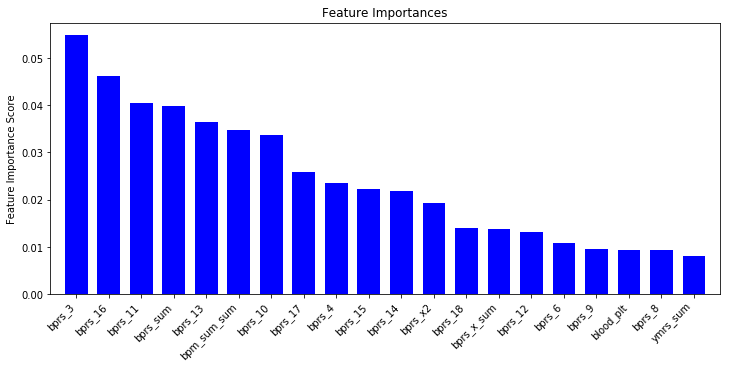

In [20]:
feat_imp = pd.DataFrame(rf_final.feature_importances_, index=dataframe_feature.columns)
feat_imp_top = feat_imp.sort_values(by=[0], ascending=False).iloc[0:20,:]
plt.figure(figsize=(12,5))
plt.bar(np.array(feat_imp_top.index), np.array(feat_imp_top.values.T)[0], color='b', width=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlim((-0.8, 19.8))
plt.ylabel('Feature Importance Score')
plt.title('Feature Importances')
plt.savefig('rf_feature_importance.png', dpi=300)

Confusion matrix, without normalization
[[94  1  0  0]
 [ 8 17  3  2]
 [ 0  1 23  1]
 [ 6  2  5 14]]


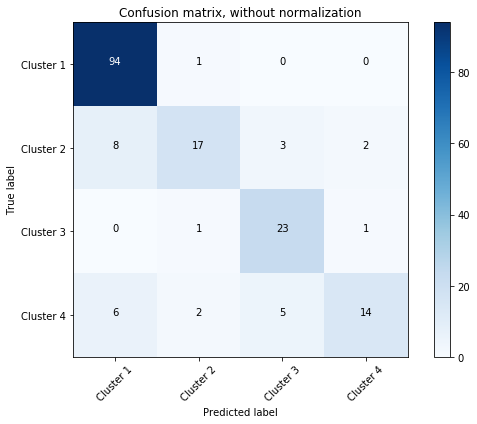

Normalized confusion matrix
[[0.98947368 0.01052632 0.         0.        ]
 [0.26666667 0.56666667 0.1        0.06666667]
 [0.         0.04       0.92       0.04      ]
 [0.22222222 0.07407407 0.18518519 0.51851852]]


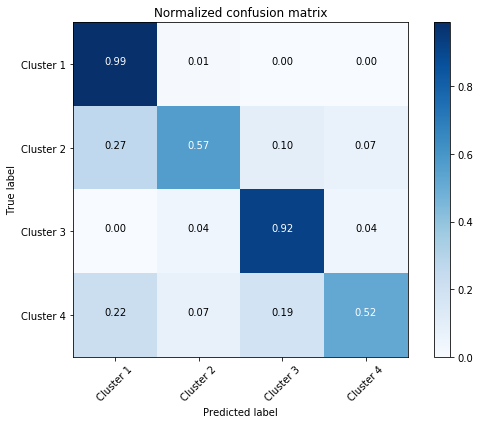

In [23]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cnf_matrix = confusion_matrix(y_test, predictions)
class_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('rf_confusion_matrix_without_norm.png', dpi=300)
plt.show()

plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('rf_confusion_matrix_with_norm.png', dpi=300)
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=class_names))

             precision    recall  f1-score   support

  Cluster 1       0.87      0.99      0.93        95
  Cluster 2       0.81      0.57      0.67        30
  Cluster 3       0.74      0.92      0.82        25
  Cluster 4       0.82      0.52      0.64        27

avg / total       0.83      0.84      0.82       177



In [25]:
from sklearn.metrics import precision_recall_fscore_support
print 'macro:', precision_recall_fscore_support(y_test, predictions, average='macro')
print 'micro:', precision_recall_fscore_support(y_test, predictions, average='micro')
print 'weighted:', precision_recall_fscore_support(y_test, predictions, average='weighted')

macro: (0.8113397688824633, 0.7486647173489279, 0.7626418122107778, None)
micro: (0.8361581920903954, 0.8361581920903954, 0.8361581920903954, None)
weighted: (0.8347716422899476, 0.8361581920903954, 0.8231515708137568, None)


In [26]:
y_predprob = rf_final.predict_proba(x_test_1)

Average precision score, micro-averaged over all classes: 0.91
Average precision score, macro-averaged over all classes: 0.88
Average precision score, weighted-averaged over all classes: 0.92


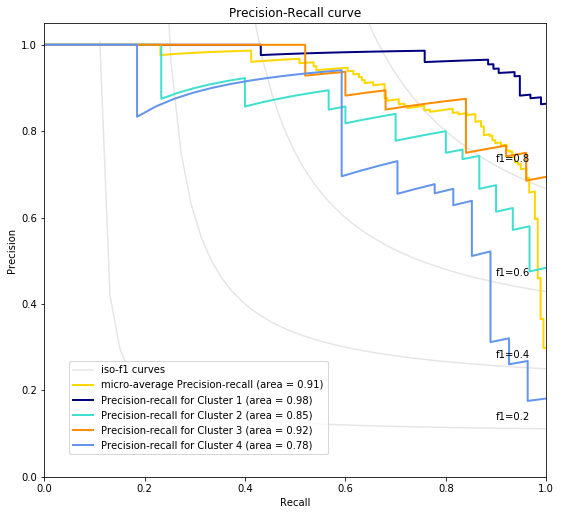

In [28]:
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
pr_precision = dict()
pr_recall = dict()
pr_average_precision = dict()
for i in range(0, 4):
    pr_precision[i], pr_recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        y_predprob[:, i])
    pr_average_precision[i] = average_precision_score(y_test_binarized[:, i], y_predprob[:, i])

# A "micro-average": quantifying score on all classes jointly
pr_precision["micro"], pr_recall["micro"], _ = precision_recall_curve(y_test_binarized.ravel(),
    y_predprob.ravel())
pr_average_precision["micro"] = average_precision_score(y_test_binarized, y_predprob,
                                                     average="micro")
pr_average_precision["macro"] = average_precision_score(y_test_binarized, y_predprob,
                                                     average="macro")
pr_average_precision["weighted"] = average_precision_score(y_test_binarized, y_predprob,
                                                     average="weighted")

print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(pr_average_precision["micro"]))
print('Average precision score, macro-averaged over all classes: {0:0.2f}'
      .format(pr_average_precision["macro"]))
print('Average precision score, weighted-averaged over all classes: {0:0.2f}'
      .format(pr_average_precision["weighted"]))

from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(9, 10))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(pr_recall["micro"], pr_precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(pr_average_precision["micro"]))

for i, color in zip(range(0, 4), colors):
    l, = plt.plot(pr_recall[i], pr_precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for Cluster {0} (area = {1:0.2f})'
                  ''.format(i+1, pr_average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(lines, labels, loc=(0.05, 0.05), prop=dict(size=10))
plt.savefig('rf_pr_curve.png', dpi=300)

AUC, micro-averaged over all classes: 0.97
AUC, macro-averaged over all classes: 0.96
AUC, weighted-averaged over all classes: 0.97


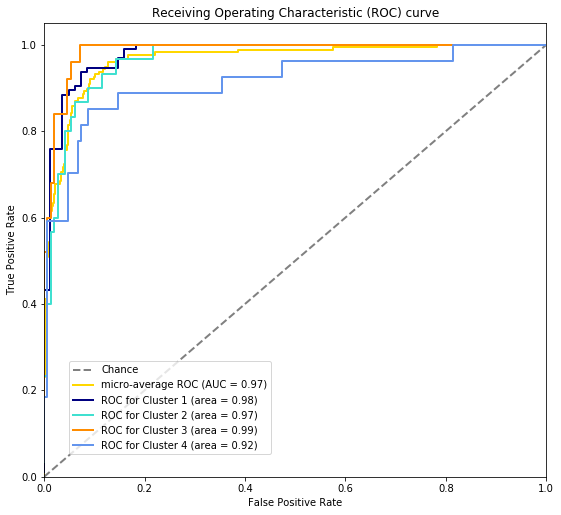

In [31]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# For each class
roc_fpr = dict()
roc_tpr = dict()
roc_auc = dict()

for i in range(0, 4):
    roc_fpr[i], roc_tpr[i], _ = roc_curve(y_test_binarized[:, i],
                                                        y_predprob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_predprob[:, i])

# A "micro-average": quantifying score on all classes jointly
roc_fpr["micro"], roc_tpr["micro"], _ = roc_curve(y_test_binarized.ravel(),
    y_predprob.ravel())
roc_auc["micro"] = roc_auc_score(y_test_binarized, y_predprob,
                                                     average="micro")
roc_auc["macro"] = roc_auc_score(y_test_binarized, y_predprob,
                                                     average="macro")
roc_auc["weighted"] = roc_auc_score(y_test_binarized, y_predprob,
                                                     average="weighted")

print('AUC, micro-averaged over all classes: {0:0.2f}'
      .format(roc_auc["micro"]))
print('AUC, macro-averaged over all classes: {0:0.2f}'
      .format(roc_auc["macro"]))
print('AUC, weighted-averaged over all classes: {0:0.2f}'
      .format(roc_auc["weighted"]))

from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(9, 10))

f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []

l, = plt.plot([0,1], [0,1], '--', color='grey', lw=2)
lines.append(l)
labels.append('Chance')

l, = plt.plot(roc_fpr["micro"], roc_tpr["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average ROC (AUC = {0:0.2f})'
              ''.format(roc_auc["micro"]))

for i, color in zip(range(0, 4), colors):
    l, = plt.plot(roc_fpr[i], roc_tpr[i], color=color, lw=2)
    lines.append(l)
    labels.append('ROC for Cluster {0} (area = {1:0.2f})'
                  ''.format(i+1, roc_auc[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiving Operating Characteristic (ROC) curve')
plt.legend(lines, labels, loc=(0.05, 0.05), prop=dict(size=10))
plt.savefig('rf_roc_curve.png', dpi=300)

In [1]:
##################
###第二轮：seed=8###
##################

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 8
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#impute missing data with -1
x_train_1 = np.array(pd.DataFrame(x_train).fillna(-1))

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.74931, std: 0.01929, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.74372, std: 0.01398, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.74372, std: 0.01398, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.74935, std: 0.01880, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.74665, std: 0.02039, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.74665, std: 0.02039, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.74106, std: 0.01912, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.72979, std: 0.01079, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.72415, std: 0.01713, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.72134, std: 0.02091, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.71852, std: 0.02378, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.80759, std: 0.02036, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.81326, std: 0.00885, para

In [6]:
rf_2 = RandomForestClassifier(n_estimators=100,  random_state=0)

choose_param_2 = {
'max_depth':range(10,17), 'min_samples_split': range(5,10)
}
best_estimator_2 = GridSearchCV(estimator = rf_2, param_grid = choose_param_2, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_2.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_2.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_2.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_2.best_score_))

每轮迭代运行结果:[mean: 0.82445, std: 0.01474, params: {'min_samples_split': 5, 'max_depth': 10}, mean: 0.82156, std: 0.01264, params: {'min_samples_split': 6, 'max_depth': 10}, mean: 0.81870, std: 0.01968, params: {'min_samples_split': 7, 'max_depth': 10}, mean: 0.82422, std: 0.02461, params: {'min_samples_split': 8, 'max_depth': 10}, mean: 0.81330, std: 0.01724, params: {'min_samples_split': 9, 'max_depth': 10}, mean: 0.82152, std: 0.01815, params: {'min_samples_split': 5, 'max_depth': 11}, mean: 0.82426, std: 0.01664, params: {'min_samples_split': 6, 'max_depth': 11}, mean: 0.81318, std: 0.02047, params: {'min_samples_split': 7, 'max_depth': 11}, mean: 0.81592, std: 0.01841, params: {'min_samples_split': 8, 'max_depth': 11}, mean: 0.81592, std: 0.01612, params: {'min_samples_split': 9, 'max_depth': 11}, mean: 0.82152, std: 0.01815, params: {'min_samples_split': 5, 'max_depth': 12}, mean: 0.82982, std: 0.02239, params: {'min_samples_split': 6, 'max_depth': 12}, mean: 0.81882, std: 0.01645, p

In [11]:
rf_3 = RandomForestClassifier(n_estimators=100,  max_depth=13, min_samples_split=6, random_state=0)

choose_param_3 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(2,7)
}
best_estimator_3 = GridSearchCV(estimator = rf_3, param_grid = choose_param_3, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_3.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_3.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_3.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_3.best_score_))

每轮迭代运行结果:[mean: 0.81608, std: 0.02297, params: {'min_samples_split': 2, 'min_samples_leaf': 1}, mean: 0.81886, std: 0.01342, params: {'min_samples_split': 3, 'min_samples_leaf': 1}, mean: 0.82163, std: 0.01707, params: {'min_samples_split': 4, 'min_samples_leaf': 1}, mean: 0.81870, std: 0.02160, params: {'min_samples_split': 5, 'min_samples_leaf': 1}, mean: 0.82993, std: 0.01970, params: {'min_samples_split': 6, 'min_samples_leaf': 1}, mean: 0.81615, std: 0.01341, params: {'min_samples_split': 2, 'min_samples_leaf': 2}, mean: 0.81615, std: 0.01341, params: {'min_samples_split': 3, 'min_samples_leaf': 2}, mean: 0.81615, std: 0.01341, params: {'min_samples_split': 4, 'min_samples_leaf': 2}, mean: 0.81322, std: 0.01306, params: {'min_samples_split': 5, 'min_samples_leaf': 2}, mean: 0.82711, std: 0.02221, params: {'min_samples_split': 6, 'min_samples_leaf': 2}, mean: 0.82441, std: 0.02155, params: {'min_samples_split': 2, 'min_samples_leaf': 3}, mean: 0.82441, std: 0.02155, params: {'min_s

In [12]:
rf_4 = RandomForestClassifier(n_estimators=100,  max_depth=13, min_samples_split=6, min_samples_leaf=1, random_state=0)

choose_param_4 = {
'max_features':range(3,24,2)
}
best_estimator_4 = GridSearchCV(estimator = rf_4, param_grid = choose_param_4, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_4.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_4.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_4.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_4.best_score_))

每轮迭代运行结果:[mean: 0.76027, std: 0.02978, params: {'max_features': 3}, mean: 0.77702, std: 0.01678, params: {'max_features': 5}, mean: 0.80211, std: 0.01748, params: {'max_features': 7}, mean: 0.80492, std: 0.03222, params: {'max_features': 9}, mean: 0.80211, std: 0.01212, params: {'max_features': 11}, mean: 0.81604, std: 0.01198, params: {'max_features': 13}, mean: 0.81878, std: 0.02749, params: {'max_features': 15}, mean: 0.82993, std: 0.01970, params: {'max_features': 17}, mean: 0.81874, std: 0.01475, params: {'max_features': 19}, mean: 0.81330, std: 0.01941, params: {'max_features': 21}, mean: 0.81886, std: 0.01004, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 17}
最佳模型得分:0.82993063486


In [13]:
rf_final = RandomForestClassifier(n_estimators=100,  max_depth=13, min_samples_split=6, min_samples_leaf=1, random_state=0, max_features=17)
rf_final.fit(x_train_1, y_train)

x_test_1 = np.array(pd.DataFrame(x_test).fillna(-1))

y_pred = rf_final.predict(x_test_1)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.75%


In [14]:
##################
###第二轮：seed=9###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 9
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#impute missing data with -1
x_train_1 = np.array(pd.DataFrame(x_train).fillna(-1))

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.74969, std: 0.04097, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.73826, std: 0.03485, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.72977, std: 0.03711, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.73278, std: 0.03553, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.73830, std: 0.03564, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.74096, std: 0.03642, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.73818, std: 0.03568, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.73548, std: 0.03249, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.73289, std: 0.02992, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.73544, std: 0.02751, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.72451, std: 0.02892, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.78906, std: 0.05469, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.78011, std: 0.05894, para

In [15]:
rf_2 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_2 = {
'min_samples_split':range(2,21,5), 'max_depth':range(10,21,2)
}
best_estimator_2 = GridSearchCV(estimator = rf_2, param_grid = choose_param_2, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_2.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_2.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_2.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_2.best_score_))

每轮迭代运行结果:[mean: 0.79975, std: 0.04505, params: {'min_samples_split': 2, 'max_depth': 10}, mean: 0.77454, std: 0.05004, params: {'min_samples_split': 7, 'max_depth': 10}, mean: 0.78840, std: 0.05320, params: {'min_samples_split': 12, 'max_depth': 10}, mean: 0.79168, std: 0.06095, params: {'min_samples_split': 17, 'max_depth': 10}, mean: 0.80261, std: 0.04542, params: {'min_samples_split': 2, 'max_depth': 12}, mean: 0.78570, std: 0.04519, params: {'min_samples_split': 7, 'max_depth': 12}, mean: 0.79084, std: 0.04115, params: {'min_samples_split': 12, 'max_depth': 12}, mean: 0.78331, std: 0.05025, params: {'min_samples_split': 17, 'max_depth': 12}, mean: 0.80261, std: 0.05354, params: {'min_samples_split': 2, 'max_depth': 14}, mean: 0.78003, std: 0.04276, params: {'min_samples_split': 7, 'max_depth': 14}, mean: 0.78813, std: 0.04450, params: {'min_samples_split': 12, 'max_depth': 14}, mean: 0.78601, std: 0.05269, params: {'min_samples_split': 17, 'max_depth': 14}, mean: 0.80276, std: 0.05

In [16]:
rf_2 = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_2 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(2,7)
}
best_estimator_2 = GridSearchCV(estimator = rf_2, param_grid = choose_param_2, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_2.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_2.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_2.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_2.best_score_))

每轮迭代运行结果:[mean: 0.80276, std: 0.05171, params: {'min_samples_split': 2, 'min_samples_leaf': 1}, mean: 0.79149, std: 0.04739, params: {'min_samples_split': 3, 'min_samples_leaf': 1}, mean: 0.78836, std: 0.04696, params: {'min_samples_split': 4, 'min_samples_leaf': 1}, mean: 0.78029, std: 0.03994, params: {'min_samples_split': 5, 'min_samples_leaf': 1}, mean: 0.78589, std: 0.04810, params: {'min_samples_split': 6, 'min_samples_leaf': 1}, mean: 0.78574, std: 0.04019, params: {'min_samples_split': 2, 'min_samples_leaf': 2}, mean: 0.78574, std: 0.04019, params: {'min_samples_split': 3, 'min_samples_leaf': 2}, mean: 0.78574, std: 0.04019, params: {'min_samples_split': 4, 'min_samples_leaf': 2}, mean: 0.77721, std: 0.05119, params: {'min_samples_split': 5, 'min_samples_leaf': 2}, mean: 0.78018, std: 0.04423, params: {'min_samples_split': 6, 'min_samples_leaf': 2}, mean: 0.78864, std: 0.04775, params: {'min_samples_split': 2, 'min_samples_leaf': 3}, mean: 0.78864, std: 0.04775, params: {'min_s

In [18]:
rf_2 = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_split=2, min_samples_leaf=1, random_state=0, n_jobs=-1)

choose_param_2 = {
'max_features':range(3,24,2)
}
best_estimator_2 = GridSearchCV(estimator = rf_2, param_grid = choose_param_2, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_2.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_2.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_2.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_2.best_score_))

每轮迭代运行结果:[mean: 0.73293, std: 0.03137, params: {'max_features': 3}, mean: 0.74096, std: 0.03642, params: {'max_features': 5}, mean: 0.77482, std: 0.02826, params: {'max_features': 7}, mean: 0.78049, std: 0.04130, params: {'max_features': 9}, mean: 0.77466, std: 0.04149, params: {'max_features': 11}, mean: 0.77466, std: 0.02644, params: {'max_features': 13}, mean: 0.78574, std: 0.03211, params: {'max_features': 15}, mean: 0.80276, std: 0.05171, params: {'max_features': 17}, mean: 0.79960, std: 0.04357, params: {'max_features': 19}, mean: 0.78547, std: 0.03273, params: {'max_features': 21}, mean: 0.77459, std: 0.03689, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 17}
最佳模型得分:0.802762521072


In [19]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_split=2, min_samples_leaf=1, random_state=0, n_jobs=-1, max_features=17)
rf_final.fit(x_train_1, y_train)

x_test_1 = np.array(pd.DataFrame(x_test).fillna(-1))

y_pred = rf_final.predict(x_test_1)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.10%


In [20]:
##################
###第3轮：seed=10###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 10
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#impute missing data with -1
x_train_1 = np.array(pd.DataFrame(x_train).fillna(-1))

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.72992, std: 0.03141, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.72992, std: 0.03012, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.73266, std: 0.02117, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.72711, std: 0.02119, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.72985, std: 0.02377, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.71576, std: 0.02035, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.71584, std: 0.01454, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.71302, std: 0.01969, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.71036, std: 0.01483, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.69917, std: 0.01361, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.68806, std: 0.02524, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.76319, std: 0.04264, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.76882, std: 0.02407, para

In [22]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(8,15), 'min_samples_split':range(2,10)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.78267, std: 0.01947, params: {'min_samples_split': 2, 'max_depth': 8}, mean: 0.78831, std: 0.02397, params: {'min_samples_split': 3, 'max_depth': 8}, mean: 0.78572, std: 0.02843, params: {'min_samples_split': 4, 'max_depth': 8}, mean: 0.78565, std: 0.03944, params: {'min_samples_split': 5, 'max_depth': 8}, mean: 0.77993, std: 0.03373, params: {'min_samples_split': 6, 'max_depth': 8}, mean: 0.79394, std: 0.02941, params: {'min_samples_split': 7, 'max_depth': 8}, mean: 0.78823, std: 0.02738, params: {'min_samples_split': 8, 'max_depth': 8}, mean: 0.77978, std: 0.03462, params: {'min_samples_split': 9, 'max_depth': 8}, mean: 0.79386, std: 0.02856, params: {'min_samples_split': 2, 'max_depth': 9}, mean: 0.78549, std: 0.02597, params: {'min_samples_split': 3, 'max_depth': 9}, mean: 0.79112, std: 0.02895, params: {'min_samples_split': 4, 'max_depth': 9}, mean: 0.78267, std: 0.01188, params: {'min_samples_split': 5, 'max_depth': 9}, mean: 0.78541, std: 0.01998, params: {'min

In [23]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=13, min_samples_split=4, random_state=0, n_jobs=-1)

choose_param_1 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(2,7)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.78275, std: 0.02238, params: {'min_samples_split': 2, 'min_samples_leaf': 1}, mean: 0.78001, std: 0.02336, params: {'min_samples_split': 3, 'min_samples_leaf': 1}, mean: 0.80224, std: 0.03465, params: {'min_samples_split': 4, 'min_samples_leaf': 1}, mean: 0.78831, std: 0.01834, params: {'min_samples_split': 5, 'min_samples_leaf': 1}, mean: 0.79097, std: 0.02436, params: {'min_samples_split': 6, 'min_samples_leaf': 1}, mean: 0.77993, std: 0.03483, params: {'min_samples_split': 2, 'min_samples_leaf': 2}, mean: 0.77993, std: 0.03483, params: {'min_samples_split': 3, 'min_samples_leaf': 2}, mean: 0.77993, std: 0.03483, params: {'min_samples_split': 4, 'min_samples_leaf': 2}, mean: 0.78839, std: 0.03429, params: {'min_samples_split': 5, 'min_samples_leaf': 2}, mean: 0.79105, std: 0.04183, params: {'min_samples_split': 6, 'min_samples_leaf': 2}, mean: 0.77704, std: 0.03833, params: {'min_samples_split': 2, 'min_samples_leaf': 3}, mean: 0.77704, std: 0.03833, params: {'min_s

In [24]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=13, min_samples_split=4, random_state=0, min_samples_leaf=1, n_jobs=-1)

choose_param_1 = {
'max_features':range(3,24,2)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.74104, std: 0.03414, params: {'max_features': 3}, mean: 0.76600, std: 0.03130, params: {'max_features': 5}, mean: 0.75458, std: 0.02682, params: {'max_features': 7}, mean: 0.76624, std: 0.03760, params: {'max_features': 9}, mean: 0.77430, std: 0.04510, params: {'max_features': 11}, mean: 0.76859, std: 0.03522, params: {'max_features': 13}, mean: 0.77719, std: 0.03636, params: {'max_features': 15}, mean: 0.80224, std: 0.03465, params: {'max_features': 17}, mean: 0.79105, std: 0.02374, params: {'max_features': 19}, mean: 0.78557, std: 0.03560, params: {'max_features': 21}, mean: 0.79942, std: 0.03630, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 17}
最佳模型得分:0.802238086051


In [25]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=13, min_samples_split=4, random_state=0, min_samples_leaf=1, n_jobs=-1, max_features=17)
rf_final.fit(x_train_1, y_train)

x_test_1 = np.array(pd.DataFrame(x_test).fillna(-1))

y_pred = rf_final.predict(x_test_1)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.36%


In [26]:
##################
###第4轮：seed=11###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 11
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#impute missing data with -1
x_train_1 = np.array(pd.DataFrame(x_train).fillna(-1))

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.76923, std: 0.03808, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.75804, std: 0.03704, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.75796, std: 0.03749, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.75530, std: 0.04902, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.76086, std: 0.04497, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.76356, std: 0.03971, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.75522, std: 0.03718, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.74677, std: 0.02555, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.74403, std: 0.02544, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.73840, std: 0.02066, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.74117, std: 0.02285, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.79995, std: 0.04856, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.79733, std: 0.06122, para

In [28]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(8,14), 'min_samples_split':range(22,27)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.80285, std: 0.04967, params: {'min_samples_split': 22, 'max_depth': 8}, mean: 0.80273, std: 0.04171, params: {'min_samples_split': 23, 'max_depth': 8}, mean: 0.79697, std: 0.03974, params: {'min_samples_split': 24, 'max_depth': 8}, mean: 0.79693, std: 0.03993, params: {'min_samples_split': 25, 'max_depth': 8}, mean: 0.79717, std: 0.04764, params: {'min_samples_split': 26, 'max_depth': 8}, mean: 0.81110, std: 0.04627, params: {'min_samples_split': 22, 'max_depth': 9}, mean: 0.80555, std: 0.04659, params: {'min_samples_split': 23, 'max_depth': 9}, mean: 0.81114, std: 0.04933, params: {'min_samples_split': 24, 'max_depth': 9}, mean: 0.80554, std: 0.05181, params: {'min_samples_split': 25, 'max_depth': 9}, mean: 0.80551, std: 0.04405, params: {'min_samples_split': 26, 'max_depth': 9}, mean: 0.80848, std: 0.05473, params: {'min_samples_split': 22, 'max_depth': 10}, mean: 0.81400, std: 0.05224, params: {'min_samples_split': 23, 'max_depth': 10}, mean: 0.81114, std: 0.04933,

In [29]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=23, random_state=0, n_jobs=-1)

choose_param_1 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(22,27)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.80848, std: 0.05473, params: {'min_samples_split': 22, 'min_samples_leaf': 1}, mean: 0.81400, std: 0.05224, params: {'min_samples_split': 23, 'min_samples_leaf': 1}, mean: 0.81114, std: 0.04933, params: {'min_samples_split': 24, 'min_samples_leaf': 1}, mean: 0.80558, std: 0.05398, params: {'min_samples_split': 25, 'min_samples_leaf': 1}, mean: 0.81126, std: 0.05693, params: {'min_samples_split': 26, 'min_samples_leaf': 1}, mean: 0.81134, std: 0.05820, params: {'min_samples_split': 22, 'min_samples_leaf': 2}, mean: 0.80570, std: 0.05875, params: {'min_samples_split': 23, 'min_samples_leaf': 2}, mean: 0.80563, std: 0.04809, params: {'min_samples_split': 24, 'min_samples_leaf': 2}, mean: 0.80844, std: 0.04826, params: {'min_samples_split': 25, 'min_samples_leaf': 2}, mean: 0.80570, std: 0.05301, params: {'min_samples_split': 26, 'min_samples_leaf': 2}, mean: 0.79999, std: 0.05165, params: {'min_samples_split': 22, 'min_samples_leaf': 3}, mean: 0.79999, std: 0.05165, para

In [30]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=23, random_state=0, min_samples_leaf=1, n_jobs=-1)

choose_param_1 = {
'max_features':range(3,24,2)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.71899, std: 0.04700, params: {'max_features': 3}, mean: 0.72431, std: 0.04477, params: {'max_features': 5}, mean: 0.77483, std: 0.04445, params: {'max_features': 7}, mean: 0.77181, std: 0.03149, params: {'max_features': 9}, mean: 0.78891, std: 0.06035, params: {'max_features': 11}, mean: 0.80574, std: 0.05960, params: {'max_features': 13}, mean: 0.80562, std: 0.04788, params: {'max_features': 15}, mean: 0.81400, std: 0.05224, params: {'max_features': 17}, mean: 0.80559, std: 0.04474, params: {'max_features': 19}, mean: 0.80566, std: 0.05458, params: {'max_features': 21}, mean: 0.80832, std: 0.04932, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 17}
最佳模型得分:0.813997807239


In [31]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=23, random_state=0, min_samples_leaf=1, n_jobs=-1, max_features=17)
rf_final.fit(x_train_1, y_train)

x_test_1 = np.array(pd.DataFrame(x_test).fillna(-1))

y_pred = rf_final.predict(x_test_1)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.40%


In [1]:
##################
######median######
###第1轮：seed=7###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 7
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#impute missing data with median

imputer_median = Imputer(strategy='median')
x_train_1 = imputer_median.fit_transform(x_train)
x_test = imputer_median.fit_transform(x_test)

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


每轮迭代运行结果:[mean: 0.72719, std: 0.04393, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.72981, std: 0.03416, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.73267, std: 0.03791, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.72997, std: 0.03554, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.73259, std: 0.03754, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.72981, std: 0.03416, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.73537, std: 0.03665, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.72433, std: 0.03720, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.72715, std: 0.04709, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.72136, std: 0.03516, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.71043, std: 0.03405, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.76606, std: 0.04107, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.76359, std: 0.03630, para

In [2]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(6,12), 'min_samples_split':range(15,20)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.76621, std: 0.02936, params: {'min_samples_split': 15, 'max_depth': 6}, mean: 0.75235, std: 0.03709, params: {'min_samples_split': 16, 'max_depth': 6}, mean: 0.76057, std: 0.03359, params: {'min_samples_split': 17, 'max_depth': 6}, mean: 0.76903, std: 0.03561, params: {'min_samples_split': 18, 'max_depth': 6}, mean: 0.77161, std: 0.02563, params: {'min_samples_split': 19, 'max_depth': 6}, mean: 0.77455, std: 0.03111, params: {'min_samples_split': 15, 'max_depth': 7}, mean: 0.77729, std: 0.03082, params: {'min_samples_split': 16, 'max_depth': 7}, mean: 0.77729, std: 0.03082, params: {'min_samples_split': 17, 'max_depth': 7}, mean: 0.76362, std: 0.03599, params: {'min_samples_split': 18, 'max_depth': 7}, mean: 0.76644, std: 0.03170, params: {'min_samples_split': 19, 'max_depth': 7}, mean: 0.77458, std: 0.03084, params: {'min_samples_split': 15, 'max_depth': 8}, mean: 0.77158, std: 0.04200, params: {'min_samples_split': 16, 'max_depth': 8}, mean: 0.77443, std: 0.02640, p

In [3]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=18, random_state=0, n_jobs=-1)

choose_param_1 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(15,20)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.77458, std: 0.03084, params: {'min_samples_split': 15, 'min_samples_leaf': 1}, mean: 0.77158, std: 0.04200, params: {'min_samples_split': 16, 'min_samples_leaf': 1}, mean: 0.77443, std: 0.02640, params: {'min_samples_split': 17, 'min_samples_leaf': 1}, mean: 0.78539, std: 0.03343, params: {'min_samples_split': 18, 'min_samples_leaf': 1}, mean: 0.78261, std: 0.03668, params: {'min_samples_split': 19, 'min_samples_leaf': 1}, mean: 0.76363, std: 0.04261, params: {'min_samples_split': 15, 'min_samples_leaf': 2}, mean: 0.75224, std: 0.03044, params: {'min_samples_split': 16, 'min_samples_leaf': 2}, mean: 0.76355, std: 0.02916, params: {'min_samples_split': 17, 'min_samples_leaf': 2}, mean: 0.76621, std: 0.03613, params: {'min_samples_split': 18, 'min_samples_leaf': 2}, mean: 0.76888, std: 0.03706, params: {'min_samples_split': 19, 'min_samples_leaf': 2}, mean: 0.76914, std: 0.03780, params: {'min_samples_split': 15, 'min_samples_leaf': 3}, mean: 0.76331, std: 0.03232, para

In [4]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=18, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_features':range(3,24,2)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.66307, std: 0.01671, params: {'max_features': 3}, mean: 0.73024, std: 0.03442, params: {'max_features': 5}, mean: 0.73028, std: 0.03066, params: {'max_features': 7}, mean: 0.76923, std: 0.04829, params: {'max_features': 9}, mean: 0.74386, std: 0.04402, params: {'max_features': 11}, mean: 0.75787, std: 0.04098, params: {'max_features': 13}, mean: 0.76899, std: 0.03436, params: {'max_features': 15}, mean: 0.78539, std: 0.03343, params: {'max_features': 17}, mean: 0.76899, std: 0.03882, params: {'max_features': 19}, mean: 0.78836, std: 0.01910, params: {'max_features': 21}, mean: 0.79126, std: 0.02811, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 23}
最佳模型得分:0.791258763656


In [5]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=18, random_state=0, min_samples_leaf=1, n_jobs=-1, max_features=23)
rf_final.fit(x_train_1, y_train)

y_pred = rf_final.predict(x_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.49%


In [6]:
##################
######median######
###第2轮：seed=8###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 8
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#impute missing data with median

imputer_median = Imputer(strategy='median')
x_train_1 = imputer_median.fit_transform(x_train)
x_test = imputer_median.fit_transform(x_test)

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.74657, std: 0.02122, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.75221, std: 0.02401, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.75213, std: 0.01969, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.75221, std: 0.02401, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.75209, std: 0.02200, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.75491, std: 0.02200, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.75209, std: 0.01568, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.74090, std: 0.01454, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.72979, std: 0.01883, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.71863, std: 0.01620, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.71582, std: 0.02133, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.80778, std: 0.02396, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.80492, std: 0.01619, para

In [7]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(6,12), 'min_samples_split':range(5,10)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.80782, std: 0.01571, params: {'min_samples_split': 5, 'max_depth': 6}, mean: 0.80489, std: 0.01656, params: {'min_samples_split': 6, 'max_depth': 6}, mean: 0.80496, std: 0.03084, params: {'min_samples_split': 7, 'max_depth': 6}, mean: 0.80496, std: 0.02355, params: {'min_samples_split': 8, 'max_depth': 6}, mean: 0.79952, std: 0.01776, params: {'min_samples_split': 9, 'max_depth': 6}, mean: 0.80496, std: 0.02355, params: {'min_samples_split': 5, 'max_depth': 7}, mean: 0.79937, std: 0.01946, params: {'min_samples_split': 6, 'max_depth': 7}, mean: 0.80477, std: 0.02176, params: {'min_samples_split': 7, 'max_depth': 7}, mean: 0.81600, std: 0.02511, params: {'min_samples_split': 8, 'max_depth': 7}, mean: 0.81048, std: 0.02338, params: {'min_samples_split': 9, 'max_depth': 7}, mean: 0.80766, std: 0.02329, params: {'min_samples_split': 5, 'max_depth': 8}, mean: 0.80778, std: 0.02396, params: {'min_samples_split': 6, 'max_depth': 8}, mean: 0.82171, std: 0.02395, params: {'min

In [8]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=7, random_state=0, n_jobs=-1)

choose_param_1 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(5,10)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.80766, std: 0.02329, params: {'min_samples_split': 5, 'min_samples_leaf': 1}, mean: 0.80778, std: 0.02396, params: {'min_samples_split': 6, 'min_samples_leaf': 1}, mean: 0.82171, std: 0.02395, params: {'min_samples_split': 7, 'min_samples_leaf': 1}, mean: 0.81619, std: 0.02656, params: {'min_samples_split': 8, 'min_samples_leaf': 1}, mean: 0.81607, std: 0.02747, params: {'min_samples_split': 9, 'min_samples_leaf': 1}, mean: 0.81337, std: 0.02557, params: {'min_samples_split': 5, 'min_samples_leaf': 2}, mean: 0.81330, std: 0.01941, params: {'min_samples_split': 6, 'min_samples_leaf': 2}, mean: 0.81044, std: 0.02816, params: {'min_samples_split': 7, 'min_samples_leaf': 2}, mean: 0.81326, std: 0.02796, params: {'min_samples_split': 8, 'min_samples_leaf': 2}, mean: 0.81044, std: 0.03211, params: {'min_samples_split': 9, 'min_samples_leaf': 2}, mean: 0.81326, std: 0.02496, params: {'min_samples_split': 5, 'min_samples_leaf': 3}, mean: 0.81326, std: 0.02496, params: {'min_s

In [9]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=7, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_features':range(3,24,2)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.70478, std: 0.01475, params: {'max_features': 3}, mean: 0.74121, std: 0.02226, params: {'max_features': 5}, mean: 0.77996, std: 0.01580, params: {'max_features': 7}, mean: 0.79370, std: 0.01576, params: {'max_features': 9}, mean: 0.79655, std: 0.01253, params: {'max_features': 11}, mean: 0.81075, std: 0.01659, params: {'max_features': 13}, mean: 0.79667, std: 0.01384, params: {'max_features': 15}, mean: 0.82171, std: 0.02395, params: {'max_features': 17}, mean: 0.82179, std: 0.02352, params: {'max_features': 19}, mean: 0.81863, std: 0.02018, params: {'max_features': 21}, mean: 0.82171, std: 0.02037, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 19}
最佳模型得分:0.821786575308


In [10]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=7, random_state=0, min_samples_leaf=1, n_jobs=-1, max_features=19)
rf_final.fit(x_train_1, y_train)

y_pred = rf_final.predict(x_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.88%


In [11]:
##################
######median######
###第3轮：seed=9###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 9
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#impute missing data with median

imputer_median = Imputer(strategy='median')
x_train_1 = imputer_median.fit_transform(x_train)
x_test = imputer_median.fit_transform(x_test)

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.74405, std: 0.03947, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.73278, std: 0.03553, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.74417, std: 0.03942, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.74370, std: 0.02375, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.73830, std: 0.03564, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.74111, std: 0.02592, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.74096, std: 0.02121, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.74085, std: 0.02850, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.74355, std: 0.02661, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.73799, std: 0.02144, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.73274, std: 0.02445, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.77170, std: 0.04818, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.76956, std: 0.03867, para

In [13]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(15,16,17), 'min_samples_split':range(10,15)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.79470, std: 0.06116, params: {'min_samples_split': 10, 'max_depth': 15}, mean: 0.78628, std: 0.05473, params: {'min_samples_split': 11, 'max_depth': 15}, mean: 0.80543, std: 0.04152, params: {'min_samples_split': 12, 'max_depth': 15}, mean: 0.79424, std: 0.04714, params: {'min_samples_split': 13, 'max_depth': 15}, mean: 0.78308, std: 0.03281, params: {'min_samples_split': 14, 'max_depth': 15}]
参数的最佳取值：{'min_samples_split': 12, 'max_depth': 15}
最佳模型得分:0.805431507967


In [14]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=12, random_state=0, n_jobs=-1)

choose_param_1 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(10,15)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.79470, std: 0.06116, params: {'min_samples_split': 10, 'min_samples_leaf': 1}, mean: 0.78628, std: 0.05473, params: {'min_samples_split': 11, 'min_samples_leaf': 1}, mean: 0.80543, std: 0.04152, params: {'min_samples_split': 12, 'min_samples_leaf': 1}, mean: 0.79424, std: 0.04714, params: {'min_samples_split': 13, 'min_samples_leaf': 1}, mean: 0.78308, std: 0.03281, params: {'min_samples_split': 14, 'min_samples_leaf': 1}, mean: 0.78034, std: 0.05172, params: {'min_samples_split': 10, 'min_samples_leaf': 2}, mean: 0.78053, std: 0.04394, params: {'min_samples_split': 11, 'min_samples_leaf': 2}, mean: 0.78879, std: 0.03954, params: {'min_samples_split': 12, 'min_samples_leaf': 2}, mean: 0.79126, std: 0.02594, params: {'min_samples_split': 13, 'min_samples_leaf': 2}, mean: 0.78308, std: 0.03521, params: {'min_samples_split': 14, 'min_samples_leaf': 2}, mean: 0.79690, std: 0.03999, params: {'min_samples_split': 10, 'min_samples_leaf': 3}, mean: 0.78292, std: 0.04512, para

In [15]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=12, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_features':range(3,24,2)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.70189, std: 0.03444, params: {'max_features': 3}, mean: 0.73610, std: 0.05630, params: {'max_features': 5}, mean: 0.75478, std: 0.03757, params: {'max_features': 7}, mean: 0.76948, std: 0.04054, params: {'max_features': 9}, mean: 0.78346, std: 0.04809, params: {'max_features': 11}, mean: 0.78605, std: 0.03904, params: {'max_features': 13}, mean: 0.78601, std: 0.03198, params: {'max_features': 15}, mean: 0.80543, std: 0.04152, params: {'max_features': 17}, mean: 0.80539, std: 0.03975, params: {'max_features': 19}, mean: 0.80261, std: 0.04036, params: {'max_features': 21}, mean: 0.79717, std: 0.04783, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 17}
最佳模型得分:0.805431507967


In [16]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=12, random_state=0, min_samples_leaf=1, n_jobs=-1, max_features=17)
rf_final.fit(x_train_1, y_train)

y_pred = rf_final.predict(x_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.79%


In [17]:
##################
######median######
###第3轮：seed=10###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 10
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#impute missing data with median

imputer_median = Imputer(strategy='median')
x_train_1 = imputer_median.fit_transform(x_train)
x_test = imputer_median.fit_transform(x_test)

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.73251, std: 0.03755, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.73533, std: 0.04098, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.73259, std: 0.03116, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.72421, std: 0.03376, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.72977, std: 0.03742, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.72140, std: 0.02387, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.72703, std: 0.02865, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.71866, std: 0.03116, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.71866, std: 0.02397, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.71318, std: 0.02477, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.71036, std: 0.02923, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.77156, std: 0.02903, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.76052, std: 0.03530, para

In [18]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(9,14), 'min_samples_split':range(19,25)}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.78831, std: 0.04095, params: {'min_samples_split': 19, 'max_depth': 9}, mean: 0.77986, std: 0.04850, params: {'min_samples_split': 20, 'max_depth': 9}, mean: 0.78275, std: 0.05293, params: {'min_samples_split': 21, 'max_depth': 9}, mean: 0.78260, std: 0.04730, params: {'min_samples_split': 22, 'max_depth': 9}, mean: 0.77712, std: 0.04719, params: {'min_samples_split': 23, 'max_depth': 9}, mean: 0.77986, std: 0.04692, params: {'min_samples_split': 24, 'max_depth': 9}, mean: 0.77704, std: 0.04024, params: {'min_samples_split': 19, 'max_depth': 10}, mean: 0.77430, std: 0.04753, params: {'min_samples_split': 20, 'max_depth': 10}, mean: 0.77148, std: 0.04529, params: {'min_samples_split': 21, 'max_depth': 10}, mean: 0.77712, std: 0.04263, params: {'min_samples_split': 22, 'max_depth': 10}, mean: 0.77422, std: 0.04540, params: {'min_samples_split': 23, 'max_depth': 10}, mean: 0.77422, std: 0.04540, params: {'min_samples_split': 24, 'max_depth': 10}, mean: 0.78815, std: 0.04

In [19]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_split=20, random_state=0, n_jobs=-1)

choose_param_1 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(19,25)}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.79112, std: 0.03412, params: {'min_samples_split': 19, 'min_samples_leaf': 1}, mean: 0.79386, std: 0.03482, params: {'min_samples_split': 20, 'min_samples_leaf': 1}, mean: 0.78557, std: 0.03228, params: {'min_samples_split': 21, 'min_samples_leaf': 1}, mean: 0.78267, std: 0.03637, params: {'min_samples_split': 22, 'min_samples_leaf': 1}, mean: 0.78267, std: 0.03425, params: {'min_samples_split': 23, 'min_samples_leaf': 1}, mean: 0.78267, std: 0.03425, params: {'min_samples_split': 24, 'min_samples_leaf': 1}, mean: 0.78283, std: 0.04505, params: {'min_samples_split': 19, 'min_samples_leaf': 2}, mean: 0.78009, std: 0.05054, params: {'min_samples_split': 20, 'min_samples_leaf': 2}, mean: 0.78557, std: 0.03560, params: {'min_samples_split': 21, 'min_samples_leaf': 2}, mean: 0.77993, std: 0.04205, params: {'min_samples_split': 22, 'min_samples_leaf': 2}, mean: 0.78549, std: 0.03832, params: {'min_samples_split': 23, 'min_samples_leaf': 2}, mean: 0.78541, std: 0.04270, para

In [20]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_split=20, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_features':range(3,24,2)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.68250, std: 0.03632, params: {'max_features': 3}, mean: 0.72155, std: 0.03678, params: {'max_features': 5}, mean: 0.72703, std: 0.02835, params: {'max_features': 7}, mean: 0.75771, std: 0.03231, params: {'max_features': 9}, mean: 0.76624, std: 0.03965, params: {'max_features': 11}, mean: 0.77148, std: 0.04965, params: {'max_features': 13}, mean: 0.76882, std: 0.02995, params: {'max_features': 15}, mean: 0.79386, std: 0.03482, params: {'max_features': 17}, mean: 0.78283, std: 0.05411, params: {'max_features': 19}, mean: 0.78549, std: 0.04419, params: {'max_features': 21}, mean: 0.78549, std: 0.03738, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 17}
最佳模型得分:0.793864557206


In [21]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_split=20, random_state=0, min_samples_leaf=1, n_jobs=-1, max_features=17)
rf_final.fit(x_train_1, y_train)

y_pred = rf_final.predict(x_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.23%


In [22]:
##################
######median######
###第3轮：seed=11###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 11
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#impute missing data with median

imputer_median = Imputer(strategy='median')
x_train_1 = imputer_median.fit_transform(x_train)
x_test = imputer_median.fit_transform(x_test)

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.76602, std: 0.02642, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.76610, std: 0.02252, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.77181, std: 0.03149, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.76618, std: 0.03720, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.75502, std: 0.04036, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.76344, std: 0.04223, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.75503, std: 0.03067, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.75784, std: 0.03168, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.74102, std: 0.03126, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.73824, std: 0.03097, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.74094, std: 0.02690, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.79713, std: 0.05087, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.79725, std: 0.05196, para

In [24]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(11,14), 'min_samples_split':range(15,20)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.81103, std: 0.04658, params: {'min_samples_split': 15, 'max_depth': 11}, mean: 0.81654, std: 0.04966, params: {'min_samples_split': 16, 'max_depth': 11}, mean: 0.81936, std: 0.04365, params: {'min_samples_split': 17, 'max_depth': 11}, mean: 0.80547, std: 0.05135, params: {'min_samples_split': 18, 'max_depth': 11}, mean: 0.80817, std: 0.04403, params: {'min_samples_split': 19, 'max_depth': 11}, mean: 0.80269, std: 0.04856, params: {'min_samples_split': 15, 'max_depth': 12}, mean: 0.81662, std: 0.04870, params: {'min_samples_split': 16, 'max_depth': 12}, mean: 0.81936, std: 0.04365, params: {'min_samples_split': 17, 'max_depth': 12}, mean: 0.81095, std: 0.04676, params: {'min_samples_split': 18, 'max_depth': 12}, mean: 0.81646, std: 0.04087, params: {'min_samples_split': 19, 'max_depth': 12}, mean: 0.80269, std: 0.04856, params: {'min_samples_split': 15, 'max_depth': 13}, mean: 0.81662, std: 0.04870, params: {'min_samples_split': 16, 'max_depth': 13}, mean: 0.82214, std

In [25]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=13, min_samples_split=17, random_state=0, n_jobs=-1)

choose_param_1 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(15,20)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.80269, std: 0.04856, params: {'min_samples_split': 15, 'min_samples_leaf': 1}, mean: 0.81662, std: 0.04870, params: {'min_samples_split': 16, 'min_samples_leaf': 1}, mean: 0.82214, std: 0.04656, params: {'min_samples_split': 17, 'min_samples_leaf': 1}, mean: 0.81380, std: 0.04901, params: {'min_samples_split': 18, 'min_samples_leaf': 1}, mean: 0.81377, std: 0.03686, params: {'min_samples_split': 19, 'min_samples_leaf': 1}, mean: 0.80551, std: 0.04421, params: {'min_samples_split': 15, 'min_samples_leaf': 2}, mean: 0.80257, std: 0.04138, params: {'min_samples_split': 16, 'min_samples_leaf': 2}, mean: 0.80531, std: 0.03637, params: {'min_samples_split': 17, 'min_samples_leaf': 2}, mean: 0.80813, std: 0.03118, params: {'min_samples_split': 18, 'min_samples_leaf': 2}, mean: 0.81372, std: 0.04067, params: {'min_samples_split': 19, 'min_samples_leaf': 2}, mean: 0.80832, std: 0.04440, params: {'min_samples_split': 15, 'min_samples_leaf': 3}, mean: 0.81384, std: 0.04129, para

In [26]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=13, min_samples_split=17, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_features':range(3,24,2)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.70490, std: 0.03675, params: {'max_features': 3}, mean: 0.74669, std: 0.04539, params: {'max_features': 5}, mean: 0.76665, std: 0.05527, params: {'max_features': 7}, mean: 0.78594, std: 0.04876, params: {'max_features': 9}, mean: 0.79971, std: 0.03995, params: {'max_features': 11}, mean: 0.80011, std: 0.05471, params: {'max_features': 13}, mean: 0.80253, std: 0.03964, params: {'max_features': 15}, mean: 0.82214, std: 0.04656, params: {'max_features': 17}, mean: 0.80269, std: 0.04032, params: {'max_features': 19}, mean: 0.81114, std: 0.04951, params: {'max_features': 21}, mean: 0.81658, std: 0.04128, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 17}
最佳模型得分:0.822137620242


In [27]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=13, min_samples_split=17, random_state=0, min_samples_leaf=1, n_jobs=-1, max_features=17)
rf_final.fit(x_train_1, y_train)

y_pred = rf_final.predict(x_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.66%


In [28]:
##################
######mean######
###第1轮：seed=7###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 7
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#impute missing data with median

imputer_mean = Imputer(strategy='mean')
x_train_1 = imputer_mean.fit_transform(x_train)
x_test = imputer_mean.fit_transform(x_test)

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.72441, std: 0.03590, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.73271, std: 0.03407, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.72985, std: 0.03489, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.73545, std: 0.03048, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.73267, std: 0.03920, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.74386, std: 0.03648, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.73553, std: 0.04420, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.72445, std: 0.04405, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.72175, std: 0.04150, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.71592, std: 0.03487, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.71877, std: 0.03852, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.75513, std: 0.03419, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.76891, std: 0.03256, para

In [29]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(7,15), 'min_samples_split':range(5,11)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.78547, std: 0.02571, params: {'min_samples_split': 5, 'max_depth': 7}, mean: 0.77988, std: 0.04087, params: {'min_samples_split': 6, 'max_depth': 7}, mean: 0.78293, std: 0.03904, params: {'min_samples_split': 7, 'max_depth': 7}, mean: 0.78277, std: 0.04177, params: {'min_samples_split': 8, 'max_depth': 7}, mean: 0.78273, std: 0.03250, params: {'min_samples_split': 9, 'max_depth': 7}, mean: 0.78014, std: 0.03650, params: {'min_samples_split': 10, 'max_depth': 7}, mean: 0.77439, std: 0.04202, params: {'min_samples_split': 5, 'max_depth': 8}, mean: 0.77987, std: 0.04250, params: {'min_samples_split': 6, 'max_depth': 8}, mean: 0.79674, std: 0.03537, params: {'min_samples_split': 7, 'max_depth': 8}, mean: 0.77455, std: 0.03971, params: {'min_samples_split': 8, 'max_depth': 8}, mean: 0.77999, std: 0.03286, params: {'min_samples_split': 9, 'max_depth': 8}, mean: 0.77142, std: 0.02697, params: {'min_samples_split': 10, 'max_depth': 8}, mean: 0.77192, std: 0.03927, params: {'m

In [30]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=7, random_state=0, n_jobs=-1)

choose_param_1 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(5,11)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.77439, std: 0.04202, params: {'min_samples_split': 5, 'min_samples_leaf': 1}, mean: 0.77987, std: 0.04250, params: {'min_samples_split': 6, 'min_samples_leaf': 1}, mean: 0.79674, std: 0.03537, params: {'min_samples_split': 7, 'min_samples_leaf': 1}, mean: 0.77455, std: 0.03971, params: {'min_samples_split': 8, 'min_samples_leaf': 1}, mean: 0.77999, std: 0.03286, params: {'min_samples_split': 9, 'min_samples_leaf': 1}, mean: 0.77142, std: 0.02697, params: {'min_samples_split': 10, 'min_samples_leaf': 1}, mean: 0.77737, std: 0.03948, params: {'min_samples_split': 5, 'min_samples_leaf': 2}, mean: 0.77470, std: 0.04104, params: {'min_samples_split': 6, 'min_samples_leaf': 2}, mean: 0.78293, std: 0.03460, params: {'min_samples_split': 7, 'min_samples_leaf': 2}, mean: 0.77733, std: 0.04060, params: {'min_samples_split': 8, 'min_samples_leaf': 2}, mean: 0.77991, std: 0.03787, params: {'min_samples_split': 9, 'min_samples_leaf': 2}, mean: 0.77713, std: 0.03442, params: {'min_

In [31]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=7, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_features':range(3,24,2)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.69117, std: 0.03270, params: {'max_features': 3}, mean: 0.71607, std: 0.03133, params: {'max_features': 5}, mean: 0.76605, std: 0.02303, params: {'max_features': 7}, mean: 0.74679, std: 0.03116, params: {'max_features': 9}, mean: 0.76057, std: 0.02977, params: {'max_features': 11}, mean: 0.75232, std: 0.03501, params: {'max_features': 13}, mean: 0.76065, std: 0.04795, params: {'max_features': 15}, mean: 0.79674, std: 0.03537, params: {'max_features': 17}, mean: 0.78578, std: 0.02642, params: {'max_features': 19}, mean: 0.77740, std: 0.02562, params: {'max_features': 21}, mean: 0.79397, std: 0.04472, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 17}
最佳模型得分:0.796742505715


In [32]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=7, random_state=0, min_samples_leaf=1, n_jobs=-1, max_features=17)
rf_final.fit(x_train_1, y_train)

y_pred = rf_final.predict(x_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.18%


In [33]:
##################
######mean######
###第1轮：seed=8###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 8
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#impute missing data with median

imputer_mean = Imputer(strategy='mean')
x_train_1 = imputer_mean.fit_transform(x_train)
x_test = imputer_mean.fit_transform(x_test)

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.74098, std: 0.01801, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.73534, std: 0.01761, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.74379, std: 0.01512, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.73820, std: 0.00833, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.74106, std: 0.01129, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.74387, std: 0.01051, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.74098, std: 0.01300, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.73264, std: 0.00786, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.72697, std: 0.01927, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.72697, std: 0.02625, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.72967, std: 0.02039, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.80215, std: 0.00731, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.80500, std: 0.01965, para

In [34]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(6,9), 'min_samples_split':range(2,10)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.81912, std: 0.03038, params: {'min_samples_split': 2, 'max_depth': 6}, mean: 0.80511, std: 0.01824, params: {'min_samples_split': 3, 'max_depth': 6}, mean: 0.80782, std: 0.01571, params: {'min_samples_split': 4, 'max_depth': 6}, mean: 0.81063, std: 0.01816, params: {'min_samples_split': 5, 'max_depth': 6}, mean: 0.81341, std: 0.02206, params: {'min_samples_split': 6, 'max_depth': 6}, mean: 0.80782, std: 0.01294, params: {'min_samples_split': 7, 'max_depth': 6}, mean: 0.81334, std: 0.01440, params: {'min_samples_split': 8, 'max_depth': 6}, mean: 0.81334, std: 0.01132, params: {'min_samples_split': 9, 'max_depth': 6}, mean: 0.82742, std: 0.01221, params: {'min_samples_split': 2, 'max_depth': 7}, mean: 0.82460, std: 0.01550, params: {'min_samples_split': 3, 'max_depth': 7}, mean: 0.81874, std: 0.01475, params: {'min_samples_split': 4, 'max_depth': 7}, mean: 0.81067, std: 0.00889, params: {'min_samples_split': 5, 'max_depth': 7}, mean: 0.81322, std: 0.01306, params: {'min

In [35]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(2,10)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.82742, std: 0.01221, params: {'min_samples_split': 2, 'min_samples_leaf': 1}, mean: 0.82460, std: 0.01550, params: {'min_samples_split': 3, 'min_samples_leaf': 1}, mean: 0.81874, std: 0.01475, params: {'min_samples_split': 4, 'min_samples_leaf': 1}, mean: 0.81067, std: 0.00889, params: {'min_samples_split': 5, 'min_samples_leaf': 1}, mean: 0.81322, std: 0.01306, params: {'min_samples_split': 6, 'min_samples_leaf': 1}, mean: 0.81615, std: 0.01003, params: {'min_samples_split': 7, 'min_samples_leaf': 1}, mean: 0.81878, std: 0.01430, params: {'min_samples_split': 8, 'min_samples_leaf': 1}, mean: 0.81322, std: 0.01581, params: {'min_samples_split': 9, 'min_samples_leaf': 1}, mean: 0.81604, std: 0.01198, params: {'min_samples_split': 2, 'min_samples_leaf': 2}, mean: 0.81604, std: 0.01198, params: {'min_samples_split': 3, 'min_samples_leaf': 2}, mean: 0.81604, std: 0.01198, params: {'min_samples_split': 4, 'min_samples_leaf': 2}, mean: 0.82438, std: 0.01285, params: {'min_s

In [36]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_features':range(3,24,2)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.70482, std: 0.01865, params: {'max_features': 3}, mean: 0.74360, std: 0.01319, params: {'max_features': 5}, mean: 0.77425, std: 0.01240, params: {'max_features': 7}, mean: 0.79674, std: 0.01534, params: {'max_features': 9}, mean: 0.81630, std: 0.03110, params: {'max_features': 11}, mean: 0.80774, std: 0.01901, params: {'max_features': 13}, mean: 0.81623, std: 0.01948, params: {'max_features': 15}, mean: 0.82742, std: 0.01221, params: {'max_features': 17}, mean: 0.82159, std: 0.02486, params: {'max_features': 19}, mean: 0.81608, std: 0.01143, params: {'max_features': 21}, mean: 0.82445, std: 0.01474, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 17}
最佳模型得分:0.827420378125


In [37]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=2, random_state=0, min_samples_leaf=1, n_jobs=-1, max_features=17)
rf_final.fit(x_train_1, y_train)

y_pred = rf_final.predict(x_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.32%


In [38]:
##################
######mean######
###第1轮：seed=9###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 9
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#impute missing data with median

imputer_mean = Imputer(strategy='mean')
x_train_1 = imputer_mean.fit_transform(x_train)
x_test = imputer_mean.fit_transform(x_test)

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.75227, std: 0.04069, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.75227, std: 0.04069, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.74667, std: 0.03846, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.74938, std: 0.02755, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.74146, std: 0.04336, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.74131, std: 0.04313, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.73274, std: 0.03104, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.73003, std: 0.02810, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.73258, std: 0.01933, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.72691, std: 0.02287, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.72706, std: 0.02302, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.78312, std: 0.04350, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.75764, std: 0.03597, para

In [40]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(14,19), 'min_samples_split':range(10,15)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.77740, std: 0.04820, params: {'min_samples_split': 10, 'max_depth': 14}, mean: 0.79092, std: 0.04536, params: {'min_samples_split': 11, 'max_depth': 14}, mean: 0.79679, std: 0.04584, params: {'min_samples_split': 12, 'max_depth': 14}, mean: 0.79697, std: 0.04505, params: {'min_samples_split': 13, 'max_depth': 14}, mean: 0.78578, std: 0.04289, params: {'min_samples_split': 14, 'max_depth': 14}, mean: 0.77200, std: 0.05699, params: {'min_samples_split': 10, 'max_depth': 15}, mean: 0.79092, std: 0.04536, params: {'min_samples_split': 11, 'max_depth': 15}, mean: 0.80532, std: 0.04975, params: {'min_samples_split': 12, 'max_depth': 15}, mean: 0.79697, std: 0.04505, params: {'min_samples_split': 13, 'max_depth': 15}, mean: 0.78308, std: 0.04738, params: {'min_samples_split': 14, 'max_depth': 15}, mean: 0.76930, std: 0.05405, params: {'min_samples_split': 10, 'max_depth': 16}, mean: 0.79092, std: 0.04536, params: {'min_samples_split': 11, 'max_depth': 16}, mean: 0.80532, std

In [41]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=12, random_state=0, n_jobs=-1)

choose_param_1 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(10,15)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.77200, std: 0.05699, params: {'min_samples_split': 10, 'min_samples_leaf': 1}, mean: 0.79092, std: 0.04536, params: {'min_samples_split': 11, 'min_samples_leaf': 1}, mean: 0.80532, std: 0.04975, params: {'min_samples_split': 12, 'min_samples_leaf': 1}, mean: 0.79697, std: 0.04505, params: {'min_samples_split': 13, 'min_samples_leaf': 1}, mean: 0.78308, std: 0.04738, params: {'min_samples_split': 14, 'min_samples_leaf': 1}, mean: 0.79157, std: 0.04707, params: {'min_samples_split': 10, 'min_samples_leaf': 2}, mean: 0.78308, std: 0.04738, params: {'min_samples_split': 11, 'min_samples_leaf': 2}, mean: 0.77486, std: 0.05214, params: {'min_samples_split': 12, 'min_samples_leaf': 2}, mean: 0.78883, std: 0.05313, params: {'min_samples_split': 13, 'min_samples_leaf': 2}, mean: 0.79408, std: 0.04716, params: {'min_samples_split': 14, 'min_samples_leaf': 2}, mean: 0.76663, std: 0.05585, params: {'min_samples_split': 10, 'min_samples_leaf': 3}, mean: 0.78323, std: 0.05639, para

In [42]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=12, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_features':range(3,24,2)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.70772, std: 0.03228, params: {'max_features': 3}, mean: 0.74158, std: 0.04760, params: {'max_features': 5}, mean: 0.74640, std: 0.02861, params: {'max_features': 7}, mean: 0.76632, std: 0.03502, params: {'max_features': 9}, mean: 0.77466, std: 0.02017, params: {'max_features': 11}, mean: 0.78060, std: 0.03981, params: {'max_features': 13}, mean: 0.78891, std: 0.04046, params: {'max_features': 15}, mean: 0.80532, std: 0.04975, params: {'max_features': 17}, mean: 0.79972, std: 0.04187, params: {'max_features': 19}, mean: 0.81346, std: 0.04539, params: {'max_features': 21}, mean: 0.80543, std: 0.05512, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 21}
最佳模型得分:0.813459133177


In [43]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=12, random_state=0, min_samples_leaf=1, n_jobs=-1, max_features=21)
rf_final.fit(x_train_1, y_train)

y_pred = rf_final.predict(x_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.53%


In [44]:
##################
######mean######
###第1轮：seed=10###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 10
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#impute missing data with median

imputer_mean = Imputer(strategy='mean')
x_train_1 = imputer_mean.fit_transform(x_train)
x_test = imputer_mean.fit_transform(x_test)

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.73525, std: 0.03938, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.72962, std: 0.03731, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.72406, std: 0.03254, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.72962, std: 0.03731, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.73251, std: 0.03299, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.72695, std: 0.02798, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.73251, std: 0.03049, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.72703, std: 0.03601, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.72155, std: 0.02961, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.71044, std: 0.02970, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.71607, std: 0.03191, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.76616, std: 0.04904, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.77719, std: 0.03624, para

In [46]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(6,11), 'min_samples_split':range(3,8)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.77453, std: 0.03366, params: {'min_samples_split': 3, 'max_depth': 6}, mean: 0.78001, std: 0.02938, params: {'min_samples_split': 4, 'max_depth': 6}, mean: 0.78541, std: 0.03453, params: {'min_samples_split': 5, 'max_depth': 6}, mean: 0.77422, std: 0.04280, params: {'min_samples_split': 6, 'max_depth': 6}, mean: 0.77164, std: 0.03226, params: {'min_samples_split': 7, 'max_depth': 6}, mean: 0.79105, std: 0.03660, params: {'min_samples_split': 3, 'max_depth': 7}, mean: 0.78549, std: 0.02597, params: {'min_samples_split': 4, 'max_depth': 7}, mean: 0.78267, std: 0.03425, params: {'min_samples_split': 5, 'max_depth': 7}, mean: 0.79120, std: 0.03109, params: {'min_samples_split': 6, 'max_depth': 7}, mean: 0.77164, std: 0.03226, params: {'min_samples_split': 7, 'max_depth': 7}, mean: 0.79112, std: 0.04324, params: {'min_samples_split': 3, 'max_depth': 8}, mean: 0.78260, std: 0.04096, params: {'min_samples_split': 4, 'max_depth': 8}, mean: 0.79105, std: 0.03988, params: {'min

In [47]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=9, min_samples_split=5, random_state=0, n_jobs=-1)

choose_param_1 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(3,8)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.78839, std: 0.02783, params: {'min_samples_split': 3, 'min_samples_leaf': 1}, mean: 0.78831, std: 0.03116, params: {'min_samples_split': 4, 'min_samples_leaf': 1}, mean: 0.80224, std: 0.02397, params: {'min_samples_split': 5, 'min_samples_leaf': 1}, mean: 0.79668, std: 0.02997, params: {'min_samples_split': 6, 'min_samples_leaf': 1}, mean: 0.78549, std: 0.02290, params: {'min_samples_split': 7, 'min_samples_leaf': 1}, mean: 0.77430, std: 0.04510, params: {'min_samples_split': 3, 'min_samples_leaf': 2}, mean: 0.77430, std: 0.04510, params: {'min_samples_split': 4, 'min_samples_leaf': 2}, mean: 0.77696, std: 0.02798, params: {'min_samples_split': 5, 'min_samples_leaf': 2}, mean: 0.78275, std: 0.02409, params: {'min_samples_split': 6, 'min_samples_leaf': 2}, mean: 0.76874, std: 0.02927, params: {'min_samples_split': 7, 'min_samples_leaf': 2}, mean: 0.77141, std: 0.03015, params: {'min_samples_split': 3, 'min_samples_leaf': 3}, mean: 0.77141, std: 0.03015, params: {'min_s

In [48]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=9, min_samples_split=5, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_features':range(3,24,2)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.73000, std: 0.03645, params: {'max_features': 3}, mean: 0.73266, std: 0.02767, params: {'max_features': 5}, mean: 0.74652, std: 0.00991, params: {'max_features': 7}, mean: 0.76585, std: 0.03469, params: {'max_features': 9}, mean: 0.74933, std: 0.04655, params: {'max_features': 11}, mean: 0.77430, std: 0.03747, params: {'max_features': 13}, mean: 0.79379, std: 0.03177, params: {'max_features': 15}, mean: 0.80224, std: 0.02397, params: {'max_features': 17}, mean: 0.79402, std: 0.03497, params: {'max_features': 19}, mean: 0.79386, std: 0.04205, params: {'max_features': 21}, mean: 0.78557, std: 0.04270, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 17}
最佳模型得分:0.802238086051


In [49]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=9, min_samples_split=5, random_state=0, min_samples_leaf=1, n_jobs=-1, max_features=17)
rf_final.fit(x_train_1, y_train)

y_pred = rf_final.predict(x_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.10%


In [50]:
##################
######mean######
###第1轮：seed=11###
##################

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV   
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_2.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]
X = dataframe_feature.values
Y = dataframe_label.values

########
seed = 11
########

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#impute missing data with median

imputer_mean = Imputer(strategy='mean')
x_train_1 = imputer_mean.fit_transform(x_train)
x_test = imputer_mean.fit_transform(x_test)

rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(3,14,2), 'min_samples_split':range(2,55,5)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.76058, std: 0.02511, params: {'min_samples_split': 2, 'max_depth': 3}, mean: 0.75773, std: 0.02451, params: {'min_samples_split': 7, 'max_depth': 3}, mean: 0.75217, std: 0.02967, params: {'min_samples_split': 12, 'max_depth': 3}, mean: 0.75773, std: 0.02451, params: {'min_samples_split': 17, 'max_depth': 3}, mean: 0.76058, std: 0.02663, params: {'min_samples_split': 22, 'max_depth': 3}, mean: 0.75506, std: 0.02910, params: {'min_samples_split': 27, 'max_depth': 3}, mean: 0.74955, std: 0.03279, params: {'min_samples_split': 32, 'max_depth': 3}, mean: 0.74939, std: 0.02177, params: {'min_samples_split': 37, 'max_depth': 3}, mean: 0.75491, std: 0.01788, params: {'min_samples_split': 42, 'max_depth': 3}, mean: 0.74098, std: 0.01786, params: {'min_samples_split': 47, 'max_depth': 3}, mean: 0.74098, std: 0.01786, params: {'min_samples_split': 52, 'max_depth': 3}, mean: 0.78320, std: 0.03903, params: {'min_samples_split': 2, 'max_depth': 5}, mean: 0.79424, std: 0.04112, para

In [52]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_depth':range(7, 12), 'min_samples_split':range(2,6)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.79721, std: 0.05442, params: {'min_samples_split': 2, 'max_depth': 7}, mean: 0.79455, std: 0.05199, params: {'min_samples_split': 3, 'max_depth': 7}, mean: 0.79443, std: 0.03792, params: {'min_samples_split': 4, 'max_depth': 7}, mean: 0.79988, std: 0.03353, params: {'min_samples_split': 5, 'max_depth': 7}, mean: 0.80531, std: 0.03216, params: {'min_samples_split': 2, 'max_depth': 8}, mean: 0.79154, std: 0.03779, params: {'min_samples_split': 3, 'max_depth': 8}, mean: 0.80817, std: 0.03353, params: {'min_samples_split': 4, 'max_depth': 8}, mean: 0.80547, std: 0.04562, params: {'min_samples_split': 5, 'max_depth': 8}, mean: 0.81384, std: 0.04129, params: {'min_samples_split': 2, 'max_depth': 9}, mean: 0.80281, std: 0.05134, params: {'min_samples_split': 3, 'max_depth': 9}, mean: 0.81377, std: 0.03617, params: {'min_samples_split': 4, 'max_depth': 9}, mean: 0.80273, std: 0.04854, params: {'min_samples_split': 5, 'max_depth': 9}, mean: 0.80265, std: 0.03856, params: {'min

In [53]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=0, n_jobs=-1)

choose_param_1 = {
'min_samples_leaf':range(1,5), 'min_samples_split':range(2,6)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.80265, std: 0.03856, params: {'min_samples_split': 2, 'min_samples_leaf': 1}, mean: 0.79725, std: 0.04631, params: {'min_samples_split': 3, 'min_samples_leaf': 1}, mean: 0.81932, std: 0.03440, params: {'min_samples_split': 4, 'min_samples_leaf': 1}, mean: 0.79991, std: 0.04315, params: {'min_samples_split': 5, 'min_samples_leaf': 1}, mean: 0.80555, std: 0.03553, params: {'min_samples_split': 2, 'min_samples_leaf': 2}, mean: 0.80555, std: 0.03553, params: {'min_samples_split': 3, 'min_samples_leaf': 2}, mean: 0.80555, std: 0.03553, params: {'min_samples_split': 4, 'min_samples_leaf': 2}, mean: 0.79169, std: 0.04792, params: {'min_samples_split': 5, 'min_samples_leaf': 2}, mean: 0.80848, std: 0.05933, params: {'min_samples_split': 2, 'min_samples_leaf': 3}, mean: 0.80848, std: 0.05933, params: {'min_samples_split': 3, 'min_samples_leaf': 3}, mean: 0.80848, std: 0.05933, params: {'min_samples_split': 4, 'min_samples_leaf': 3}, mean: 0.80848, std: 0.05933, params: {'min_s

In [54]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=0, n_jobs=-1)

choose_param_1 = {
'max_features':range(3,24,2)
}
best_estimator_1 = GridSearchCV(estimator = rf_1, param_grid = choose_param_1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_1.fit(x_train_1, y_train)
print('每轮迭代运行结果:{0}'.format(best_estimator_1.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_1.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_1.best_score_))

每轮迭代运行结果:[mean: 0.74125, std: 0.04794, params: {'max_features': 3}, mean: 0.74986, std: 0.04802, params: {'max_features': 5}, mean: 0.78007, std: 0.03871, params: {'max_features': 7}, mean: 0.78332, std: 0.04243, params: {'max_features': 9}, mean: 0.79443, std: 0.04667, params: {'max_features': 11}, mean: 0.81110, std: 0.04202, params: {'max_features': 13}, mean: 0.79709, std: 0.03298, params: {'max_features': 15}, mean: 0.81932, std: 0.03440, params: {'max_features': 17}, mean: 0.81674, std: 0.04557, params: {'max_features': 19}, mean: 0.81388, std: 0.03752, params: {'max_features': 21}, mean: 0.81091, std: 0.04198, params: {'max_features': 23}]
参数的最佳取值：{'max_features': 17}
最佳模型得分:0.819323980412


In [55]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=0, min_samples_leaf=1, n_jobs=-1, max_features=17)
rf_final.fit(x_train_1, y_train)

y_pred = rf_final.predict(x_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.84%
